# Какие ключевые шаги необходимо выполнить для планирования и проведения MVT-теста?

**Планирование и проведение MVT-теста: ключевые шаги**

Многовариантное тестирование (MVT) — это способ оценить, как несколько изменений на странице вместе влияют на поведение пользователей. В отличие от A/B-теста, где вы просто сравниваете одну версию с другой, MVT показывает взаимодействие элементов. На практике это выглядит так: вы проверяете, работает ли, например, новый заголовок лучше со старой кнопкой или с новой. Это мощный, но требовательный к трафику метод.
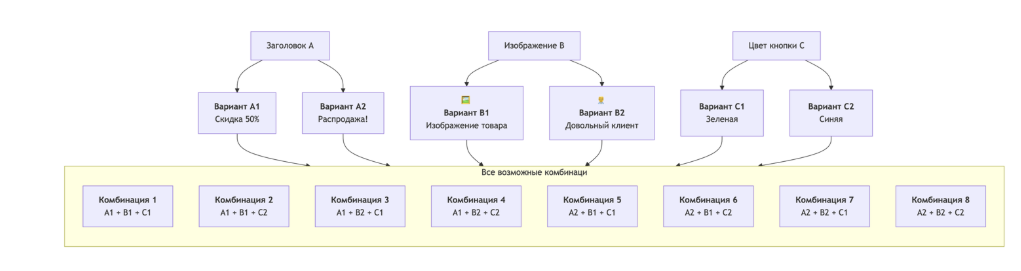

### 1. Определение цели и гипотез

Все начинается не с выбора кнопок, а с вопроса: «Что мы хотим узнать или доказать?» Формальная цель вроде «увеличить конверсию» не сработает. Нужна конкретная и проверяемая гипотеза. Например: «Мы полагаем, что комбинация короткого ценностного предложения в заголовке и зеленой кнопки «Начать бесплатно» увеличит регистрации на мобильных устройствах на 10%». Это сразу задает рамки.

Ключевая сложность здесь — не перегрузить тест. В стремлении проверить всё сразу легко получить десятки комбинаций. Для трех факторов с двумя вариантами каждый — это уже 8 групп. Добавьте четвертый — и будет 16. Нужного трафика может просто не найтись, поэтому важно жестко отбирать только самые важные и неочевидные гипотезы.

### 2. Выбор факторов и уровней  

Фактор — это изменяемый элемент (цвет кнопки, текст заголовка, изображение). Уровень — его конкретное состояние (красный/зеленый, короткий/длинный).

Когда факторов много, используют дробный факторный дизайн (Fractional Factorial). Проще говоря, это умный способ протестировать не все возможные комбинации (например, не все 16 из 4 факторов), а только их часть (скажем, 8). Это позволяет оценить влияние каждого фактора в среднем и основные взаимодействия, жертвуя оценкой сложных, редко значимых эффектов. Это компромисс между глубиной и скоростью.

### 3. Расчет статистической мощности и длительности теста
Базовый расчет строится на формуле: `(Минимальный размер группы * Количество комбинаций) / Ежедневный трафик`.

Допустим, для надежного результата по каждой комбинации нужно 1000 уникальных пользователей. У нас 8 комбинаций и ежедневный трафик в 5000 человек. Считаем: `(1000 * 8) / 5000 = 1.6 дня`. Теоретически. На практике всегда нужно закладывать запас (20-30%) и помнить о поправках на множественные сравнения. Когда вы одновременно проверяете много гипотез, растет шанс ложноположительного результата.

### 4. Техническая реализация

- **Инструменты**: Настроить распределение трафика через Google Optimize, Optimizely или кастомные решения.
- **Проверка корректности**: Убедиться, что пользователи не попадают в разные группы при повторных визитах (например, через cookie или device ID).
- **Пример ошибки**: В одном проекте из-за сбоя в сегментации 15% пользователей видели два варианта лендинга одновременно — это потребовало перезапуска теста.

### 5. Запуск и мониторинг
- **Первые 24–48 часов**: Отслеживать технические сбои (например, ошибки загрузки элементов) и аномалии в метриках.
- **Внешние факторы**: Фиксировать события, которые могут исказить данные (например, рекламные кампании или сезонные всплески трафика).
- **Досрочная остановка**: Использовать **Sequential Probability Ratio Test (SPRT)** для раннего завершения теста при достижении статистической значимости. Например, если одна комбинация показывает p-value < 0.01 после 3 дней.

### 6. Анализ результатов
Здесь стандартного сравнения «какая группа лучше» недостаточно. Ценность MVT — в анализе взаимодействия факторов.

Основной инструмент — ANOVA. Он позволяет оценить не только влияние каждого фактора по отдельности («важен ли цвет кнопки?»), но и их совместный эффект («зависит ли эффект от цвета кнопки от того, какой стоит заголовок?»). Значимое взаимодействие (p-value < 0.05) означает, что элементы влияют на результат вместе, а не просто независимо.

Визуализация — тепловая карта. Она наглядно показывает, какие конкретные комбинации дают пиковые значения метрики.

Для нестандартных метрик (например, средний чек, где данные часто имеют «скошенное» распределение с выбросами) используют обобщенные линейные модели (GLM) с подходящим распределением (например, Гамма) или бутстрап для построения доверительных интервалов.

### 7. Внедрение и документирование
Лучшую комбинацию внедряем. Но не менее важно задокументировать процесс: цели, гипотезы, сроки теста, особенности аудитории и внешние факторы. Это поможет в будущем понять, почему результат мог измениться.

MVT не дает окончательного ответа на все вопросы. Часто он выявляет оптимальную «связку» элементов, которую затем нужно проверить в чистом A/B-тесте против текущей версии. А иногда его главный вывод — понимание того, как элементы интерфейса работают вместе, что само по себе ценнее разового роста конверсии

# Ответы на подвопросы

### В чем основное отличие MVT от A/B-тестирования?
- **A/B-тест**: Сравнивает 2 варианта одного элемента (например, синяя vs оранжевая кнопка).
- **MVT**: Тестирует несколько факторов одновременно (цвет кнопки + текст заголовка + расположение блока) и их взаимодействие.
- **Пример из лекции**: MVT позволяет выявить, что зеленая кнопка с жирным текстом в верхней части страницы дает максимальную конверсию, тогда как A/B-тест покажет только лучший цвет кнопки.
- **Трейдофф**: MVT требует в *k* раз больше данных (где *k* — число комбинаций), чем A/B-тест.

### Какие метрики обычно используются для оценки эффективности MVT?
- **Основные**:
  — Конверсия (в покупку, в заявку),
  — CTR (для баннеров),
  — Средний чек (для e-commerce).
- **Дополнительные**: Показатель отказов, глубина просмотра, NPS.
- **Скошенные метрики**: Для среднего чека использовать **GLM с Гамма-распределением** или **бутстрап**, чтобы избежать искажений из-за выбросов.

### Как определить количество групп в MVT?
- **Полный факторный дизайн**: Число групп = произведение уровней факторов (например, 2×2×2 = 8 групп).
- **Дробный факторный дизайн**: Сокращает количество комбинаций, исключая малозначимые взаимодействия. Например, для 5 факторов по 2 уровня вместо 32 групп протестировать 8–16.
- **Практическое правило**: Ограничиться 4–5 факторами даже при дробном дизайне, иначе длительность теста станет неприемлемой.  
- **Формула длительности** помогает оценить реалистичность плана.

### Какие риски связаны с проведением MVT?
- **Недостаток трафика**: Экспоненциальный рост комбинаций требует огромной выборки. Решение — дробный дизайн.
- **Нестационарность данных**: Изменение предпочтений пользователей во времени (например, сезонные тренды). Решение — адаптивные Bandit-алгоритмы с «забыванием» (например, скользящее окно).
- **Скошенные метрики**: Стандартные методы (ANOVA) дают смещенные результаты. Решение — GLM или бутстрап.
- **Инфляция ошибки I рода**: При множественных сравнениях вероятность ложного открытия растет. Решение — поправки (Holm-Bonferroni, O’Brien-Fleming для SPRT).
- **Сложность интерпретации**: Взаимодействие факторов требует глубокого анализа, а не только сравнения средних.

### Как интерпретировать взаимодействие факторов в MVT?
- **Что такое взаимодействие**: Эффект одного фактора зависит от уровня другого. Например, красная кнопка увеличивает конверсию только при наличии видео на странице.
- **Методы анализа**:
  — **ANOVA** с включением термина взаимодействия (interaction term),
  — **Тепловые карты** комбинаций (например, в Jupyter Notebook или Tableau),
  — **Регрессионные модели** с интерактивными переменными.
- **Пример из практики**: В тесте формы регистрации поле «Номер телефона» снижало конверсию только если стояло после поля «Email». Это позволило оптимизировать порядок полей без полного удаления элемента.
- **Важно**: Если взаимодействие статистически значимо (p-value < 0.05), анализировать факторы отдельно некорректно.